<a href="https://colab.research.google.com/github/Emsh1379/EEG_classic/blob/main/Comparing_behavioral_labeling_of_classical_machine_learning_with_quantum_machine_learning_on_AJILE12_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring AJILE12 dataset

## Objective

This notebook is for group student projects in [Ibn Sina](https://t.me/+OvL4zhCSeohjNTE8) of [IPM](https://ipm.ac.ir/).

## Scientific background

The AJILE12 dataset is the largest publicly available human neurobehavioral dataset, recorded during passive clinical epilepsy monitoring. It includes synchronized intracranial neural recordings and upper body pose trajectories across 55 semi-continuous days of naturalistic movements, along with relevant metadata. The dataset was created to understand the neural basis of human movement in naturalistic scenarios and expand neuroscience research beyond constrained laboratory paradigms. It is available on The DANDI Archive in the Neurodata Without Borders (NWB) data standard and can be explored using a browser-based dashboard.

For scientific background, see the following papers from [Bing Brunton lab](https://www.bingbrunton.com/bing) who graciously has released the **AJILE12 dandiset** on [DANDI](https://dandiarchive.org/dandiset/000055?search=ajile12&pos=1):

**Behavioral and Neural Variability of Naturalistic Arm Movements**. eNeuro, 2021. https://doi.org/10.1523/ENEURO.0007-21.2021

**Mining naturalistic human behaviors in long-term video and neural recordings**. Journal of Neuroscience Methods, 2021. https://doi.org/10.1016/j.jneumeth.2021.109199

## Data

Annotated Joints in Long-term Electrocorticography (AJILE12) from human participants; the dataset was recorded opportunistically during passive clinical epilepsy monitoring. AJILE12 includes synchronized intracranial neural recordings and upper body pose trajectories across 55 semi-continuous days of naturalistic movements, along with relevant metadata, including thousands of wrist movement events and annotated behavioral states. Neural recordings are available at 500 Hz from at least 64 electrodes per participant, for a total of 1280 hours. Pose trajectories at 9 upper-body keypoints, including wrist, elbow, and shoulder joints, were sampled at 30 frames per second and estimated from 118 million video frames.

The following link provides some information on the dataset:
[AJILE Data Readme](https://www.bingbrunton.com/ajile-readme)

The following paper provides a more through detail on data and acquisition:

**AJILE12: Long-term naturalistic human intracranial neural recordings and pose**. Scientific Data, 2022. https://doi.org/10.1038/s41597-022-01280-y

<img src="https://github.com/NeuromatchAcademy/course-content/blob/main/projects/docs/template_images/NeuromatchProject_AJILE12.svg?raw=1" width="1200">


## Environment Setup

This code is meant to be run in a notebook. It checks if the notebook is running on a Google Colab GPU, and if it is, it clones the Neuromatch-AJILE12 repository from GitHub, changes the current working directory to the Neuromatch-AJILE12k directory, and installs the package in editable mode using pip. This is done to set up the environment for using the Neuromatch-AJILE12 package in a Google Colab notebook. If you wish to run this code on a local machine, you can comment the next cell and simply clone the git link below.

In [ ]:
# @title Install dependencies
!pip install seaborn --quiet
!pip install statsmodels --quiet
!pip install natsort --quiet
!pip install pynwb --quiet
!pip install dandi --quiet
!pip install ndx-events --quiet
!pip install fsspec --quiet
!pip install h5py --quiet
!pip install nwbwidgets --quiet
!pip install nilearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.0/332.0 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

## Read/Download data

### NWB format

**AJILE12** is in **[NWB](https://www.nwb.org/)** format. NWB is a Hierarchical Data Format (HDF) intended for scientific data. HDF is a platform-independent file format that can be used on many different computers, regardless of the operating system that machine is running. To know more about HDF, you can visit [HDFGroup](https://portal.hdfgroup.org/display/support/Documentation).

For more information about NWB, see the following papers.

Neurodata Without Borders: Creating a Common Data Format for Neurophysiology. Neuron, 2015. https://doi.org/10.1016/j.neuron.2015.10.025

The Neurodata Without Borders ecosystem for neurophysiological data science. eLife, 2022. https://doi.org/10.7554/eLife.78362

[NWB documentation](https://nwb-overview.readthedocs.io/en/latest/) provides further information on the data structure and Python/Matlab APIs to access it.


### Setup for read/download

In [ ]:
# Numerical and plotting packages
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import natsort
from scipy.signal import sosfiltfilt, butter, hilbert
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Libraries needed for this notebook to interact with the DANDI API
from pynwb import NWBHDF5IO
from dandi.dandiapi import DandiAPIClient

# Libraries needed for this notebook to interact with NWB events
from ndx_events import LabeledEvents, AnnotatedEventsTable, Events

# FSSpec is a library that allows us to read files from the cloud
import fsspec

# NWB is based on HF5, so we need this library to read NWB files
import h5py

In [ ]:
from matplotlib import gridspec
import nilearn.plotting as ni_plt

### Access to data on cloud
The data is hosted on [AMAZON AWS](https://aws.amazon.com) in **S3** buckets. The following steps guide you to locate the data based on the **dandiset** information, setup streaming and reading the data from the cloud.

Each subject has multiple experimental sessions. You can check that programatically.

In [ ]:
# get the path to each subject's session behavior/ecephys files
with DandiAPIClient() as client:
    paths = []
    for file in client.get_dandiset("000055", "draft").get_assets_with_path_prefix(""):
        paths.append(file.path)
paths = natsort.natsorted(paths)
# print(paths)
paths

['sub-01/sub-01_ses-3_behavior+ecephys.nwb',
 'sub-01/sub-01_ses-4_behavior+ecephys.nwb',
 'sub-01/sub-01_ses-5_behavior+ecephys.nwb',
 'sub-01/sub-01_ses-7_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-3_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-4_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-5_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-6_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-3_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-4_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-5_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-6_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-3_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-4_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-5_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-6_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-7_behavior+ecephys.nwb',
 'sub-05/sub-05_ses-3_behavior+ecephys.nwb',
 'sub-05/sub-05_ses-4_behavior+ecephys.nwb',
 'sub-05/sub-05_ses-7_behavior+ecephys.nwb',
 'sub-06/sub-06_ses-3_behavior+ecephys.nwb',
 'sub-06/sub-06_ses-4_behavior+ecephys.nwb',
 'sub-06/s

###Extract Data characteristics of each participant
Get the list of hemisphere implanted, and number of recording days for each participant and turn it to a dataframe.

In [ ]:
def surf_elecs(group_names):
    """Determine surface v. depth ECoG electrodes"""
    surf = []
    for label in group_names:
        if "grid" in label.lower():
            surf.append(True)
        elif label.lower() in ["mhd", "latd", "lmtd", "ltpd"]:
            surf.append(True)  # special cases
        elif (label.lower() == "ahd") & ("PHD" not in group_names):
            surf.append(True)  # special case
        elif "d" in label.lower():
            surf.append(False)
        else:
            surf.append(True)
    return np.array(surf)

In [ ]:
def load_data_characteristics(nparts=12, fs=None):
    """Load data characteristics including the number of
    good and total ECoG electrodes, hemisphere implanted,
    and number of recording days for each participant."""
    with DandiAPIClient() as client:
        paths = []
        for file in client.get_dandiset("000055", "draft").get_assets_with_path_prefix(""):
            paths.append(file.path)
    paths = natsort.natsorted(paths)

    n_elecs_tot, n_elecs_good = [], []
    rec_days, hemis, n_elecs_surf_tot, n_elecs_depth_tot = [], [], [], []
    n_elecs_surf_good, n_elecs_depth_good = [], []
    for part_ind in tqdm(range(nparts)):
        fids = [val for val in paths if "sub-" + str(part_ind + 1).zfill(2) in val]
        rec_days.append(len(fids))
        for fid in fids[:1]:
            with DandiAPIClient() as client:
                asset = client.get_dandiset("000055", "draft").get_asset_by_path(fid)
                s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)
            f = fs.open(s3_path, "rb")
            file = h5py.File(f)
            with NWBHDF5IO(file=file, mode='r', load_namespaces=True) as io:
                nwb = io.read()

                # Determine good/total electrodes
                n_elecs_good.append(np.sum(nwb.electrodes["good"][:]))
                n_elecs_tot.append(len(nwb.electrodes["good"][:]))

                # Determine implanted hemisphere
                c_wrist = (
                    nwb.processing["behavior"].data_interfaces["ReachEvents"].description[0]
                )
                hemis.append("L" if c_wrist == "r" else "R")

                # Determine surface vs. depth electrode count
                is_surf = surf_elecs(nwb.electrodes["group_name"][:])
                n_elecs_surf_tot.append(np.sum(is_surf))
                n_elecs_depth_tot.append(np.sum(1 - is_surf))
                n_elecs_surf_good.append(
                    np.sum(nwb.electrodes["good"][is_surf.nonzero()[0]])
                )
                n_elecs_depth_good.append(
                    np.sum(nwb.electrodes["good"][(1 - is_surf).nonzero()[0]])
                )

            del nwb, io

    part_nums = [val + 1 for val in range(nparts)]
    part_ids = ["P" + str(val).zfill(2) for val in part_nums]

    return [
        rec_days,
        hemis,
        n_elecs_surf_tot,
        n_elecs_surf_good,
        n_elecs_depth_tot,
        n_elecs_depth_good,
        part_nums,
        part_ids,
        n_elecs_good,
        n_elecs_tot,
    ]

# Selection of participant

In [ ]:
# Subject and session number for loading dataThese parameters can be adjusted to analyze other electrodes, frequency bands, behavior types, participants, sessions, etc.
sbj, session = 1, 3  # participant 1, session 3

In [ ]:
# You can read specific sections within individual data files directly from remote stores such as the DANDI Archive.
# This is especially useful for reading small pieces of data from a large NWB file stored remotely. First, you will need to get the location of the file.
# Now you can get the url of a particular NWB file using the dandiset ID and the path of that file within the dandiset.
with DandiAPIClient() as client:
    asset = client.get_dandiset("000055").get_asset_by_path(
        "sub-{0:>02d}/sub-{0:>02d}_ses-{1:.0f}_behavior+ecephys.nwb".format(sbj, session)
    )
    s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)

In [ ]:
# s3_path is the url of the file on the DANDI Archive. You can now use this url to read the file using pynwb.
# Note that this url path may change if the file is updated on the DANDI Archive. ALWAYS use the "dandiset ID" and "path" to the file within the dandiset to get the url.
s3_path

'https://dandiarchive.s3.amazonaws.com/blobs/e54/21f/e5421ff3-05f6-4d5e-a884-6d3e57a11951'

In [ ]:
# You can also read specific sections within individual data files directly from remote stores such as the DANDI Archive.
from fsspec.implementations.cached import CachingFileSystem

# Note, caching is set once per access. If you want to change the cache location, you will need to restart the kernel.
fs = CachingFileSystem(
    fs=fsspec.filesystem("http"),
    cache_storage="nwb-cache",  # Local folder for the cache
)

f = fs.open(s3_path, "rb")
file = h5py.File(f)
io = NWBHDF5IO(file=file, mode='r', load_namespaces=True)
nwbfile = io.read()

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [ ]:
rec_days, hemi, surf_tot, surf_good, depth_tot, depth_good,  part_nums, part_ids, n_elecs_good, n_elecs_tot = load_data_characteristics(fs=fs)

ages = [
    44, 20, 33, 19, 31, 37, 26, 33, 20, 34, 34, 22
]  # not found in data files
gender = [
    'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'M'
]  # not found in data files
surf_elecs = [str(val_good)+' / '+str(val_tot) for val_good, val_tot in zip(surf_good, surf_tot)]
depth_elecs = [str(val_good)+' / '+str(val_tot) for val_good, val_tot in zip(depth_good, depth_tot)]

# Generate a dataframe with the data characteristics
pd.DataFrame(
    [part_ids, gender, ages, rec_days, hemi, surf_elecs, depth_elecs],
    index=[
        'Participant',
        'Gender',
        'Age (years)',
        'Recording days used',
        'Hemisphere implanted',
        'Surface electrodes: # good / total',
        'Depth electrodes: # good / total'
    ]
).T

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
  8%|▊         | 1/12 [00:00<00:04,  2.25it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hd

Participant Gender Age (years) Recording days used Hemisphere implanted  \
0          P01      M          44                   4                    L   
1          P02      M          20                   4                    R   
2          P03      M          33                   4                    L   
3          P04      F          19                   5                    R   
4          P05      F          31                   3                    R   
5          P06      M          37                   5                    L   
6          P07      M          26                   5                    R   
7          P08      F          33                   5                    R   
8          P09      M          20                   5                    L   
9          P10      M          34                   5                    L   
10         P11      F          34                   5                    L   
11         P12      M          22                   5                    L   

   Surface electrodes: # good / total Depth electrodes: # good / total  
0                             79 / 86                            6 / 8  
1                             69 / 70                          16 / 16  
2                             79 / 80                           0 / 16  
3                             67 / 84                            0 / 0  
4                           104 / 106                            0 / 0  
5                             70 / 80                            0 / 0  
6                             63 / 64                            0 / 0  
7                             83 / 92                            0 / 0  
8                             96 / 98                          28 / 28  
9                             82 / 86                          39 / 40  
10                          103 / 106                            0 / 0  
11                            88 / 92                          24 / 32

Alternatively, you can access the data on **[DANDI](https://dandiarchive.org/dandiset/000055?search=ajile12&pos=1)** and dowload it with github account.

### Examine NWB

Check NWB file and its content.

In [ ]:
# You can now access the data in the file as you would normally do with NWB files.
nwbfile

root pynwb.file.NWBFile at 0x134472736169824
Fields:
  acquisition: {
    ECGL <class 'pynwb.base.TimeSeries'>,
    ECGR <class 'pynwb.base.TimeSeries'>,
    EOGL <class 'pynwb.base.TimeSeries'>,
    EOGR <class 'pynwb.base.TimeSeries'>,
    ElectricalSeries <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    ECG <class 'pynwb.device.Device'>,
    EOG <class 'pynwb.device.Device'>,
    GRID <class 'pynwb.device.Device'>,
    LAT <class 'pynwb.device.Device'>,
    LID <class 'pynwb.device.Device'>,
    LMT <class 'pynwb.device.Device'>,
    LPT <class 'pynwb.device.Device'>,
    LTO <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    ECG <class 'pynwb.ecephys.ElectrodeGroup'>,
    EOG <class 'pynwb.ecephys.ElectrodeGroup'>,
    GRID <class 'pynwb.ecephys.ElectrodeGroup'>,
    LAT <class 'pynwb.ecephys.ElectrodeGroup'>,
    LID <class 'pynwb.ecephys.ElectrodeGroup'>,
    LMT <class 'pynwb.ecephys.ElectrodeGroup'>,
    LPT <class 'pynwb.ecephys.ElectrodeGroup'>,
    LTO <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  file_create_date: [datetime.datetime(2021, 6, 9, 5, 44, 48, 194751, tzinfo=tzoffset(None, -14400))]
  identifier: 4c571b6c-1028-476f-b0e1-e34aa27b3206
  intervals: {
    epochs <class 'pynwb.epoch.TimeIntervals'>,
    reaches <class 'pynwb.epoch.TimeIntervals'>
  }
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  session_description: no description
  session_id: 3
  session_start_time: 2000-01-02 19:00:00-05:00
  subject: subject pynwb.file.Subject at 0x134472726130416
Fields:
  species: Homo sapiens
  subject_id: 01

  timestamps_reference_time: 2000-01-02 19:00:00-05:00

Get information about the electrodes.

In [ ]:
# Information about the electrodes is stored in the nwbfile.electrodes table.
nwbfile.electrodes

electrodes hdmf.common.table.DynamicTable at 0x134472726125904
Fields:
  colnames: ['x' 'y' 'z' 'imp' 'location' 'filtering' 'group' 'group_name'
 'standard_deviation' 'kurtosis' 'median_deviation' 'good' 'low_freq_R2'
 'high_freq_R2']
  columns: (
    x <class 'hdmf.common.table.VectorData'>,
    y <class 'hdmf.common.table.VectorData'>,
    z <class 'hdmf.common.table.VectorData'>,
    imp <class 'hdmf.common.table.VectorData'>,
    location <class 'hdmf.common.table.VectorData'>,
    filtering <class 'hdmf.common.table.VectorData'>,
    group <class 'hdmf.common.table.VectorData'>,
    group_name <class 'hdmf.common.table.VectorData'>,
    standard_deviation <class 'hdmf.common.table.VectorData'>,
    kurtosis <class 'hdmf.common.table.VectorData'>,
    median_deviation <class 'hdmf.common.table.VectorData'>,
    good <class 'hdmf.common.table.VectorData'>,
    low_freq_R2 <class 'hdmf.common.table.VectorData'>,
    high_freq_R2 <class 'hdmf.common.table.VectorData'>
  )
  description: metadata about extracellular electrodes
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [ ]:
# assign the cloud path to a variable
from hdmf.common.table import DynamicTable

# Convert Dynamic Table to DataFrame
electrodes = nwbfile.electrodes.to_dataframe()
electrodes

x          y          z  imp location       filtering  \
id                                                                  
0  -45.648495  38.560372  36.187962  NaN  unknown  250 Hz lowpass   
1  -47.347152  31.182861  41.176799  NaN  unknown  250 Hz lowpass   
2  -50.291409  22.157208  45.191885  NaN  unknown  250 Hz lowpass   
3  -51.358961  11.787268  48.726509  NaN  unknown  250 Hz lowpass   
4  -51.219818   1.713889  53.000981  NaN  unknown  250 Hz lowpass   
..        ...        ...        ...  ...      ...             ...   
89 -34.106273 -88.149114 -19.819989  NaN  unknown  250 Hz lowpass   
90 -44.753871 -80.476379 -19.968393  NaN  unknown  250 Hz lowpass   
91 -51.026277 -73.221686 -18.328451  NaN  unknown  250 Hz lowpass   
92 -55.946660 -65.490942 -15.617273  NaN  unknown  250 Hz lowpass   
93 -64.432361 -56.451734 -15.885566  NaN  unknown  250 Hz lowpass   

                                                group group_name  \
id                                                                 
0   GRID pynwb.ecephys.ElectrodeGroup at 0x1344727...       GRID   
1   GRID pynwb.ecephys.ElectrodeGroup at 0x1344727...       GRID   
2   GRID pynwb.ecephys.ElectrodeGroup at 0x1344727...       GRID   
3   GRID pynwb.ecephys.ElectrodeGroup at 0x1344727...       GRID   
4   GRID pynwb.ecephys.ElectrodeGroup at 0x1344727...       GRID   
..                                                ...        ...   
89  LTO pynwb.ecephys.ElectrodeGroup at 0x13447272...        LTO   
90  LTO pynwb.ecephys.ElectrodeGroup at 0x13447272...        LTO   
91  LTO pynwb.ecephys.ElectrodeGroup at 0x13447272...        LTO   
92  LTO pynwb.ecephys.ElectrodeGroup at 0x13447272...        LTO   
93  LTO pynwb.ecephys.ElectrodeGroup at 0x13447272...        LTO   

    standard_deviation  kurtosis  median_deviation   good  low_freq_R2  \
id                                                                       
0            35.398535  6.154781         28.978650  False     0.013106   
1            55.518727  1.309332         48.247142   True    -0.004729   
2            33.992008  1.585154         31.077800   True    -0.003226   
3            33.701261  2.652564         28.651509   True     0.036002   
4            59.648470  2.626867         51.301159   True     0.096380   
..                 ...       ...               ...    ...          ...   
89           58.315750  2.708134         42.559665   True    -0.009470   
90           55.756859  3.443116         40.267286   True    -0.008794   
91           48.797883  2.870422         35.445855   True    -0.002914   
92           53.387982  3.111747         39.170996   True    -0.014049   
93           44.315540  4.469270         32.020394   True    -0.012604   

    high_freq_R2  
id                
0      -0.001107  
1      -0.019041  
2      -0.003235  
3      -0.013343  
4      -0.014212  
..           ...  
89     -0.007675  
90     -0.011022  
91     -0.013156  
92      0.005038  
93     -0.011215  

[94 rows x 14 columns]

In [ ]:
nwbfile.acquisition

{'ECGL': ECGL pynwb.base.TimeSeries at 0x134472726122736
 Fields:
   comments: no comments
   conversion: nan
   data: <HDF5 dataset "data": shape (43200000,), type "<f4">
   description: Electrooculography for tracking saccades - left
   offset: 0.0
   rate: 500.0
   resolution: -1.0
   starting_time: 0.0
   starting_time_unit: seconds
   unit: V,
 'ECGR': ECGR pynwb.base.TimeSeries at 0x134472726123936
 Fields:
   comments: no comments
   conversion: nan
   data: <HDF5 dataset "data": shape (43200000,), type "<f4">
   description: Electrooculography for tracking saccades - right
   offset: 0.0
   rate: 500.0
   resolution: -1.0
   starting_time: 0.0
   starting_time_unit: seconds
   unit: V,
 'EOGL': EOGL pynwb.base.TimeSeries at 0x134472726122976
 Fields:
   comments: no comments
   conversion: nan
   data: <HDF5 dataset "data": shape (43200000,), type "<f4">
   description: Electrooculography for tracking saccades - left
   offset: 0.0
   rate: 500.0
   resolution: -1.0
   starting

### Find Deep Electrodes

In [ ]:
print(electrodes["group_name"].unique())

['GRID' 'LID' 'LAT' 'LMT' 'LPT' 'LTO']


In [ ]:
#  LID electrodes

electrodes[electrodes['group_name'].isin(['LID'])]


x         y          z  imp location       filtering  \
id                                                                 
64 -28.175184 -0.416707   4.996675  NaN  unknown  250 Hz lowpass   
65 -33.997963  1.285343   6.552893  NaN  unknown  250 Hz lowpass   
66 -39.132553  3.845989   7.041398  NaN  unknown  250 Hz lowpass   
67 -43.933359  5.311805   7.666797  NaN  unknown  250 Hz lowpass   
68 -48.351517  6.317219   9.387165  NaN  unknown  250 Hz lowpass   
69 -53.653382  7.926083   9.524762  NaN  unknown  250 Hz lowpass   
70 -55.462186  3.383565  13.529843  NaN  unknown  250 Hz lowpass   
71 -57.813432  1.378466  16.762136  NaN  unknown  250 Hz lowpass   

                                                group group_name  \
id                                                                 
64  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   
65  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   
66  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   
67  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   
68  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   
69  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   
70  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   
71  LID pynwb.ecephys.ElectrodeGroup at 0x13447272...        LID   

    standard_deviation    kurtosis  median_deviation   good  low_freq_R2  \
id                                                                         
64           30.712941   18.223669         23.139496   True     0.011753   
65          403.155913  406.268243         14.979018  False     0.006998   
66           25.840109    4.817467         20.649516   True    -0.010156   
67           35.091816    4.477294         27.325198   True     0.009076   
68           33.336284  104.579456         26.760242  False     0.031645   
69           12.556798    2.849938         10.004388   True     0.008053   
70           15.770264    7.099858          8.785642   True     0.035004   
71           16.685005    7.091175          9.448123   True     0.031547   

    high_freq_R2  
id                
64     -0.011642  
65      0.007322  
66     -0.011369  
67     -0.006387  
68     -0.020421  
69      0.026429  
70     -0.007739  
71     -0.006875

### Specify Characteristics

In [ ]:
list(nwbfile.processing['behavior'].data_interfaces['Position'].spatial_series.keys())

['L_Ear',
 'L_Elbow',
 'L_Shoulder',
 'L_Wrist',
 'Nose',
 'R_Ear',
 'R_Elbow',
 'R_Shoulder',
 'R_Wrist']

In [ ]:
coarse_labels = nwbfile.intervals['epochs'].to_dataframe()
list(coarse_labels['labels'].unique())

['Blocklist (Data break)',
 'Sleep/rest',
 'Talk',
 'Inactive',
 'Blocklist (Private time)',
 'Blocklist (Tether/bandage)',
 'Other activity',
 'Talk, TV',
 'Computer/phone',
 'TV',
 'Eat, Talk',
 'Blocklist (Experiment)',
 '',
 'Eat, TV',
 'Blocklist (Camera move/zoom)']

In [ ]:
# Subject and session number for loading dataThese parameters can be adjusted to analyze other electrodes, frequency bands, behavior types, participants, sessions, etc.
# Example:
# Select data from participant 1, session 3 only during times that the participant was sleeping.
# ECoG data will be converted to spectral power in the Sleep band (8-13 Hz).
# We will also look at the vertical velocity of the right wrist.


behavior_type = 'Sleep/rest' # only analyze data during eating
neural_freq_range = [8, 13]  # Frequency band of interest in Hz
ecog_ch_num = 64 # selected deep electrode
keypoint_of_interest = 'R_Wrist' # right wrist movement
pose_direction = 'vertical'  # 'vertical' or 'horizontal'

### Plot ECoG electrode locations

In [ ]:
def _plot_electrodes(
    locs,
    node_size,
    colors,
    axes,
    sides_2_display,
    N,
    node_edge_colors,
    alpha,
    edge_linewidths,
    marker="o",
):
    """
    Handles plotting of electrodes.
    """
    if N == 1:
        ni_plt.plot_connectome(
            np.eye(locs.shape[0]),
            locs,
            output_file=None,
            node_kwargs={
                "alpha": alpha,
                "edgecolors": node_edge_colors,
                "linewidths": edge_linewidths,
                "marker": marker,
            },
            node_size=node_size,
            node_color=colors,
            axes=axes,
            display_mode=sides_2_display,
        )
    elif sides_2_display == "yrz" or sides_2_display == "ylz":
        colspans = [
            5,
            6,
            5,
        ]  # different sized subplot to make saggital view similar size to other two slices
        current_col = 0
        total_colspans = int(np.sum(np.asarray(colspans)))
        for ind, colspan in enumerate(colspans):
            axes[ind] = plt.subplot2grid(
                (1, total_colspans), (0, current_col), colspan=colspan, rowspan=1
            )
            ni_plt.plot_connectome(
                np.eye(locs.shape[0]),
                locs,
                output_file=None,
                node_kwargs={
                    "alpha": alpha,
                    "edgecolors": node_edge_colors,
                    "linewidths": edge_linewidths,
                    "marker": marker,
                },
                node_size=node_size,
                node_color=colors,
                axes=axes[ind],
                display_mode=sides_2_display[ind],
            )
            current_col += colspan
    else:
        for i in range(N):
            ni_plt.plot_connectome(
                np.eye(locs.shape[0]),
                locs,
                output_file=None,
                node_kwargs={
                    "alpha": alpha,
                    "edgecolors": node_edge_colors,
                    "linewidths": edge_linewidths,
                    "marker": marker,
                },
                node_size=node_size,
                node_color=colors,
                axes=axes[i],
                display_mode=sides_2_display[i],
            )

In [ ]:
def plot_ecog_electrodes_mni_from_nwb_file(
    nwb_dat,
    chan_labels="all",
    num_grid_chans=64,
    colors=None,
    node_size=50,
    figsize=(16, 6),
    sides_2_display="auto",
    node_edge_colors=None,
    alpha=0.5,
    edge_linewidths=3,
    ax_in=None,
    rem_zero_chans=False,
    allLH=False,
    zero_rem_thresh=0.99,
    elec_col_suppl=None,
):
    """
    Plots ECoG electrodes from MNI coordinate file (only for specified labels)
    NOTE: If running in Jupyter, use '%matplotlib inline' instead of '%matplotlib notebook'
    """
    # Load channel locations
    chan_info = nwb_dat.electrodes.to_dataframe()

    # Create dataframe for electrode locations
    if chan_labels == "all":
        locs = chan_info.loc[:, ["x", "y", "z"]]
    elif chan_labels == "allgood":
        locs = chan_info.loc[:, ["x", "y", "z", "good"]]
    else:
        locs = chan_info.loc[chan_labels, ["x", "y", "z"]]
    if colors is not None:
        if (locs.shape[0] > len(colors)) & isinstance(colors, list):
            locs = locs.iloc[: len(colors), :]
    #     locs.rename(columns={'X':'x','Y':'y','Z':'z'}, inplace=True)
    chan_loc_x = chan_info.loc[:, "x"].values

    # Remove NaN electrode locations (no location info)
    nan_drop_inds = np.nonzero(np.isnan(chan_loc_x))[0]
    locs.dropna(axis=0, inplace=True)  # remove NaN locations
    if (colors is not None) & isinstance(colors, list):
        colors_new, loc_inds_2_drop = [], []
        for s, val in enumerate(colors):
            if not (s in nan_drop_inds):
                colors_new.append(val)
            else:
                loc_inds_2_drop.append(s)
        colors = colors_new.copy()

        if elec_col_suppl is not None:
            loc_inds_2_drop.reverse()  # go from high to low values
            for val in loc_inds_2_drop:
                del elec_col_suppl[val]

    if chan_labels == "allgood":
        goodChanInds = chan_info.loc[:, "good", :]
        inds2drop = np.nonzero(locs["good"] == 0)[0]
        locs.drop(columns=["good"], inplace=True)
        locs.drop(locs.index[inds2drop], inplace=True)

        if colors is not None:
            colors_new, loc_inds_2_drop = [], []
            for s, val in enumerate(colors):
                if not (s in inds2drop):
                    #                     np.all(s!=inds2drop):
                    colors_new.append(val)
                else:
                    loc_inds_2_drop.append(s)
            colors = colors_new.copy()

            if elec_col_suppl is not None:
                loc_inds_2_drop.reverse()  # go from high to low values
                for val in loc_inds_2_drop:
                    del elec_col_suppl[val]

    if rem_zero_chans:
        # Remove channels with zero values (white colors)
        colors_new, loc_inds_2_drop = [], []
        for s, val in enumerate(colors):
            if np.mean(val) < zero_rem_thresh:
                colors_new.append(val)
            else:
                loc_inds_2_drop.append(s)
        colors = colors_new.copy()
        locs.drop(locs.index[loc_inds_2_drop], inplace=True)

        if elec_col_suppl is not None:
            loc_inds_2_drop.reverse()  # go from high to low values
            for val in loc_inds_2_drop:
                del elec_col_suppl[val]

    # Decide whether to plot L or R hemisphere based on x coordinates
    if len(sides_2_display) > 1:
        N, axes, sides_2_display = _setup_subplot_view(locs, sides_2_display, figsize)
    else:
        N = 1
        axes = ax_in
        if allLH:
            average_xpos_sign = np.mean(np.asarray(locs["x"]))
            if average_xpos_sign > 0:
                locs["x"] = -locs["x"]
            sides_2_display = "l"

    if colors is None:
        colors = list()

    # Label strips/depths differently for easier visualization (or use defined color list)
    if len(colors) == 0:
        for s in range(locs.shape[0]):
            if s >= num_grid_chans:
                colors.append("r")
            else:
                colors.append("b")

    if elec_col_suppl is not None:
        colors = elec_col_suppl.copy()

    # Rearrange to plot non-grid electrode first
    if num_grid_chans > 0:  # isinstance(colors, list):
        locs2 = locs.copy()
        locs2["x"] = np.concatenate(
            (locs["x"][num_grid_chans:], locs["x"][:num_grid_chans]), axis=0
        )
        locs2["y"] = np.concatenate(
            (locs["y"][num_grid_chans:], locs["y"][:num_grid_chans]), axis=0
        )
        locs2["z"] = np.concatenate(
            (locs["z"][num_grid_chans:], locs["z"][:num_grid_chans]), axis=0
        )

        if isinstance(colors, list):
            colors2 = colors.copy()
            colors2 = colors[num_grid_chans:] + colors[:num_grid_chans]
        else:
            colors2 = colors
    else:
        locs2 = locs.copy()
        if isinstance(colors, list):
            colors2 = colors.copy()
        else:
            colors2 = colors  # [colors for i in range(locs2.shape[0])]

    # Plot the result
    _plot_electrodes(
        locs2,
        node_size,
        colors2,
        axes,
        sides_2_display,
        N,
        node_edge_colors,
        alpha,
        edge_linewidths,
    )

In [ ]:
def plot_ecog_descript(
    n_elecs_tot,
    n_elecs_good,
    part_ids,
    nparts=12,
    allLH=False,
    nrows=3,
    chan_labels="all",
    width=7,
    height=3,
    fs=None
):
    """Plot ECoG electrode positions and identified noisy
    electrodes side by side."""
    with DandiAPIClient() as client:
        paths = []
        for file in client.get_dandiset("000055", "draft").get_assets_with_path_prefix(""):
            paths.append(file.path)
    paths = natsort.natsorted(paths)

    fig = plt.figure(figsize=(width * 3, height * 3), dpi=150)
    # First subplot: electrode locations
    ncols = nparts // nrows
    gs = gridspec.GridSpec(
        nrows=nrows,
        ncols=ncols,  # +2,
        figure=fig,
        width_ratios=[width / ncols]
        * ncols,  # [width/ncols/2]*ncols+[width/10, 4*width/10],
        height_ratios=[height / nrows] * nrows,
        wspace=0,
        hspace=-0.5,
    )
    ax = [None] * (nparts)  # +1)

    for part_ind in tqdm(range(nparts)):
        # Load NWB data file
        fids = [val for val in paths if "sub-" + str(part_ind + 1).zfill(2) in val]
        with DandiAPIClient() as client:
            asset = client.get_dandiset("000055", "draft").get_asset_by_path(fids[0])
            s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)

        f = fs.open(s3_path, "rb")
        file = h5py.File(f)
        with NWBHDF5IO(file=file, mode='r', load_namespaces=True) as io:
            nwb = io.read()

            # Determine hemisphere to display
            if allLH:
                sides_2_display = "l"
            else:
                average_xpos_sign = np.nanmean(nwb.electrodes["x"][:])
                sides_2_display = "r" if average_xpos_sign > 0 else "l"

            # Run electrode plotting function
            ax[part_ind] = fig.add_subplot(gs[part_ind // ncols, part_ind % ncols])
            plot_ecog_electrodes_mni_from_nwb_file(
                nwb,
                chan_labels,
                num_grid_chans=64,
                node_size=50,
                colors="silver",
                alpha=0.9,
                sides_2_display=sides_2_display,
                node_edge_colors="k",
                edge_linewidths=1.5,
                ax_in=ax[part_ind],
                allLH=allLH,
            )

        del nwb, io
    #         ax[part_ind].text(-0.2,0.1,'P'+str(part_ind+1).zfill(2), fontsize=8)
    #     fig.text(0.1, 0.91, '(a) ECoG electrode positions', fontsize=10)

    # Second subplot: noisy electrodes per participant
    #     ax[-1] = fig.add_subplot(gs[:, -1])
    #     ax[-1].bar(part_ids,n_elecs_tot,color='lightgrey')
    #     ax[-1].bar(part_ids,n_elecs_good,color='dimgrey')
    #     ax[-1].spines['right'].set_visible(False)
    #     ax[-1].spines['top'].set_visible(False)
    #     ax[-1].set_xticklabels(part_ids, rotation=45)
    #     ax[-1].legend(['Total','Good'], frameon=False, fontsize=8)
    #     ax[-1].tick_params(labelsize=9)
    #     ax[-1].set_ylabel('Number of electrodes', fontsize=9, labelpad=0)
    #     ax[-1].set_title('(b) Total/good electrodes per participant',
    #                     fontsize=10)
    plt.show()
    return fig


  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
  8%|▊         | 1/12 [00:00<00:07,  1.53it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hd

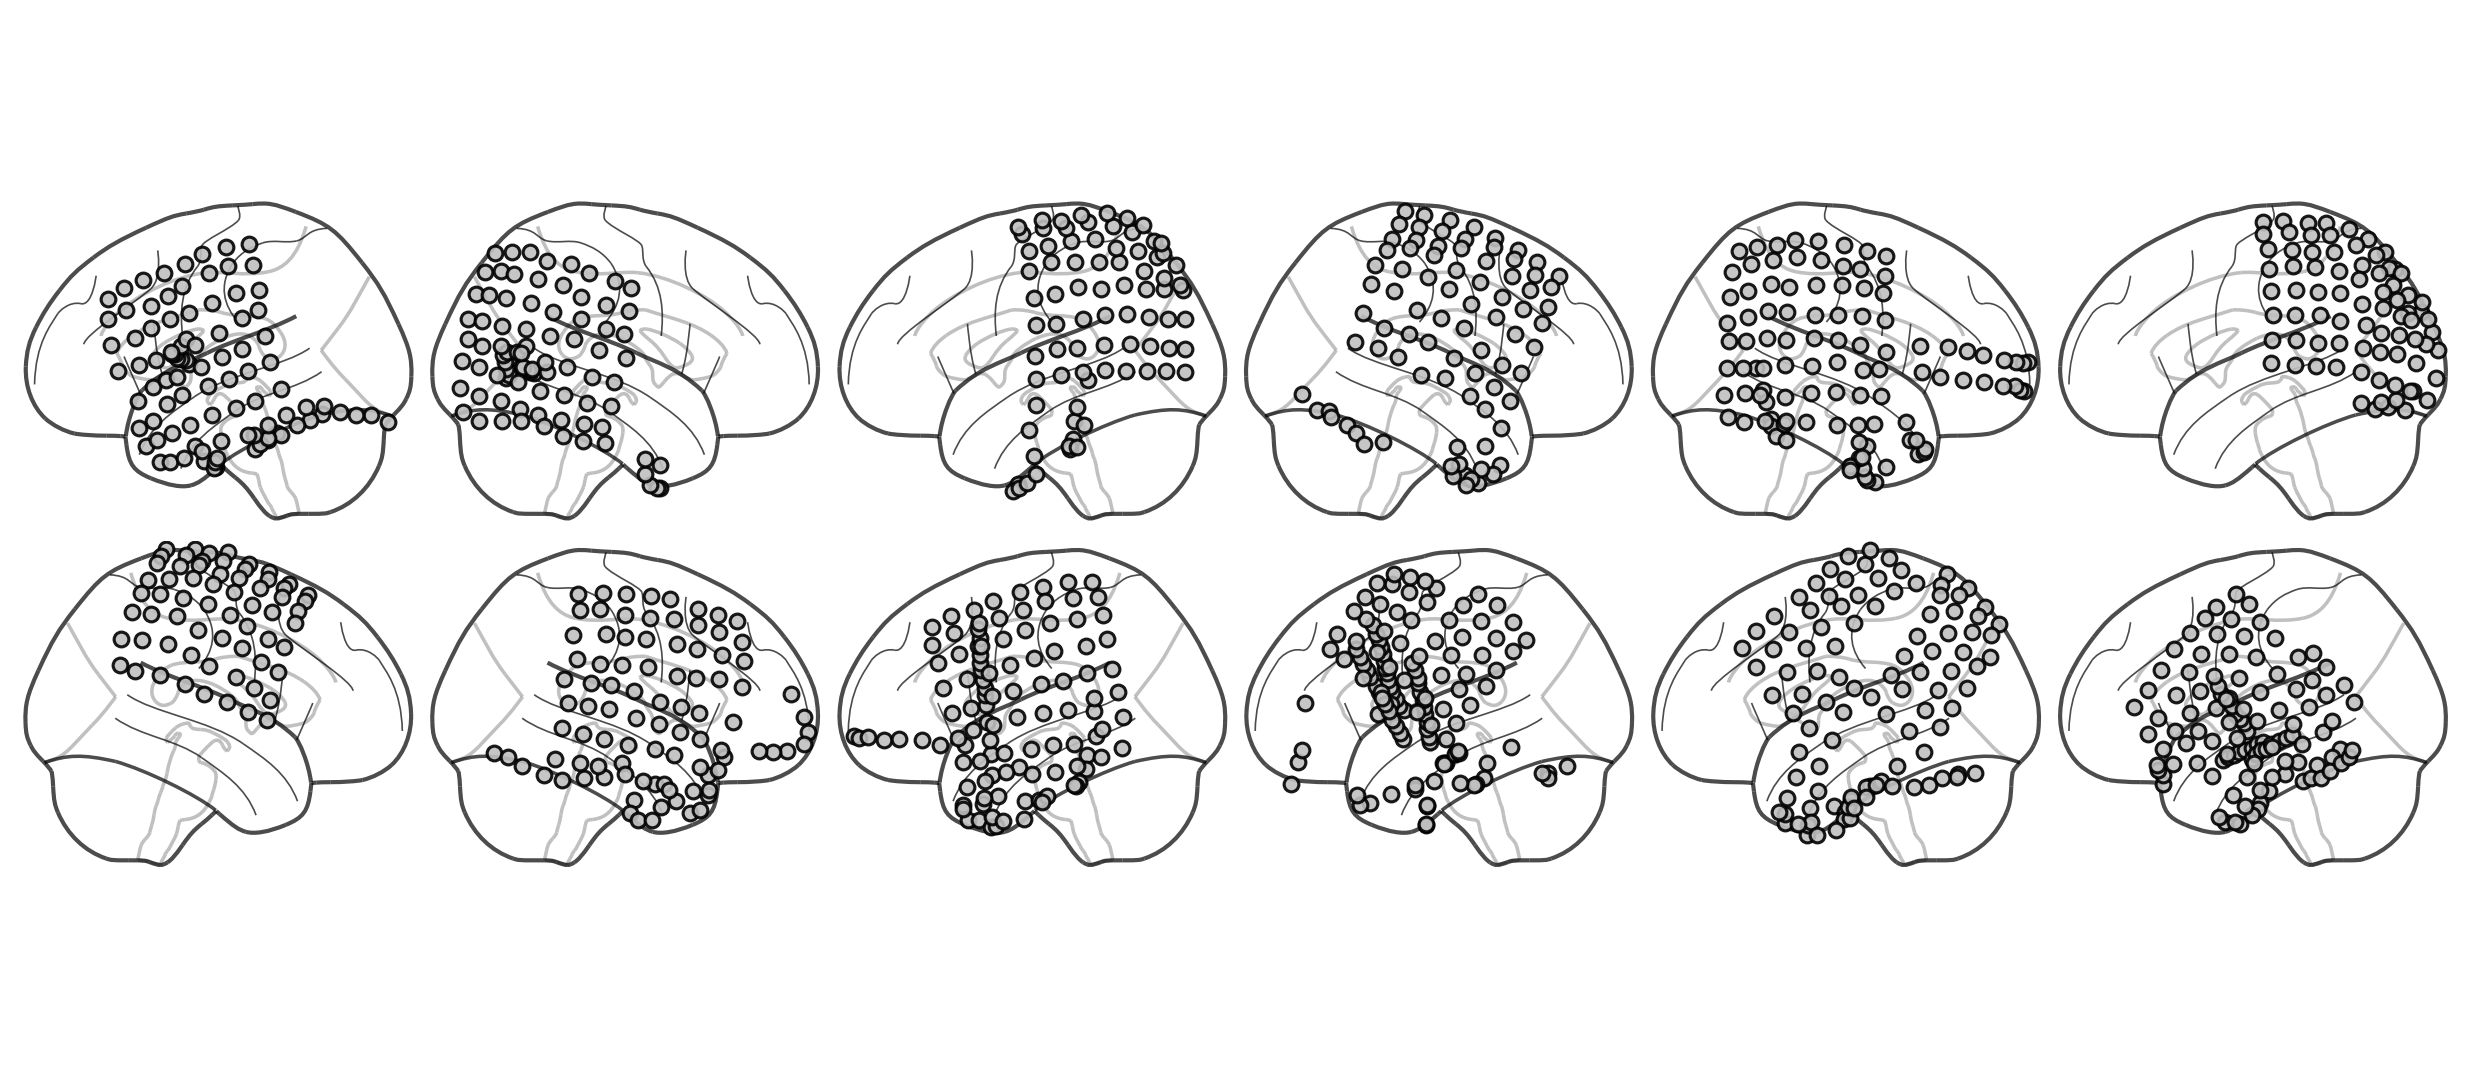

In [ ]:
# Load data characteristics including the number of good and total ECoG electrodes,
# # hemisphere implanted, and number of recording days for each participant.

fig = plot_ecog_descript(n_elecs_tot, n_elecs_good, part_ids, nrows=2,fs=fs)

### Show All Channels

In [ ]:
# Decrease sample frequency to 1 Hz
eeg_data = nwbfile.acquisition['ElectricalSeries'].data[::500,:]



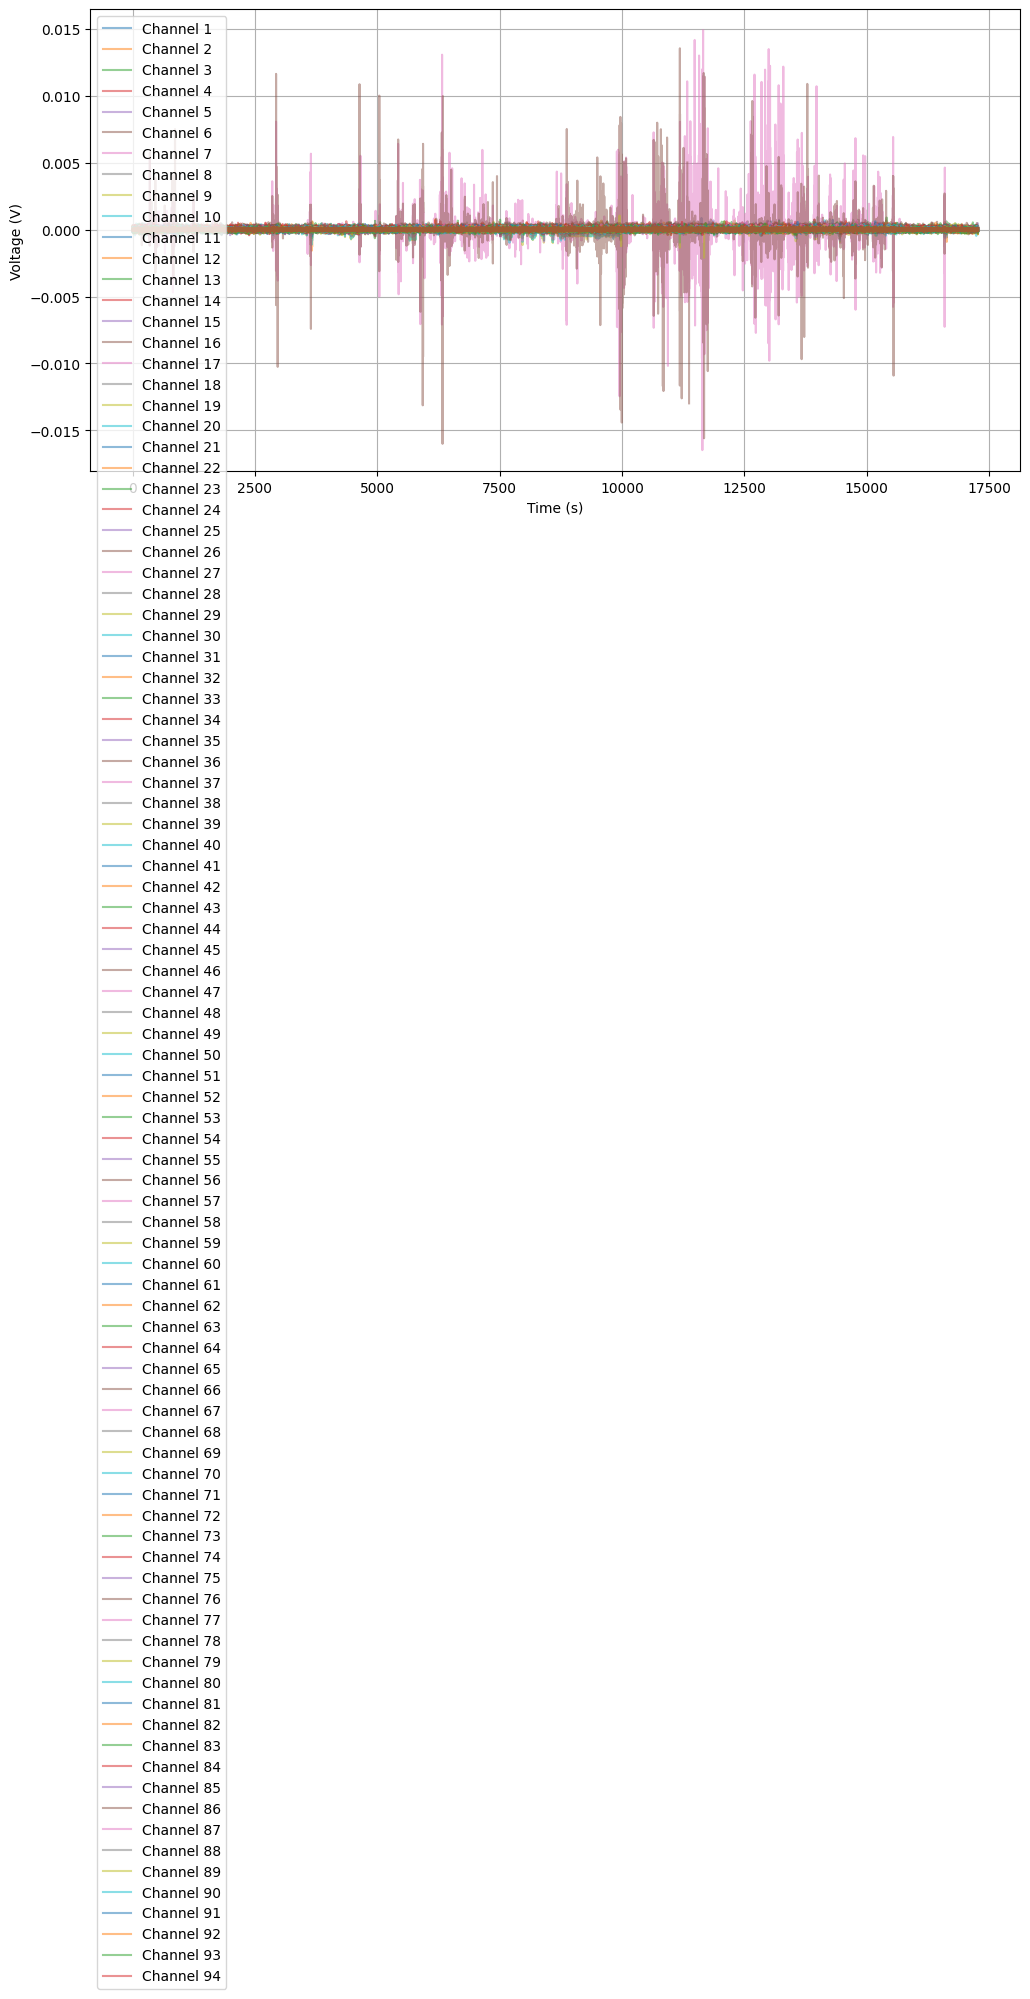

In [ ]:
# you have your EEG data in a NumPy array
sample_rate = nwbfile.acquisition['ElectricalSeries'].rate/100  # Sample rate in Hz

# Calculate time vector based on the provided information
starting_time = 0.0  # Start time in seconds
time = np.arange(eeg_data.shape[0]) / sample_rate + starting_time

# Apply the unit conversion factor to convert to volts (V)
conversion_factor = 1e-06
eeg_data_V = eeg_data * conversion_factor

# Create a time vs EEG voltage plot
plt.figure(figsize=(12, 6))

# Plot each channel
for i in range(eeg_data_V.shape[1]):
    plt.plot(time, eeg_data_V[:, i], label=f'Channel {i+1}', alpha=0.5)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()
plt.show()



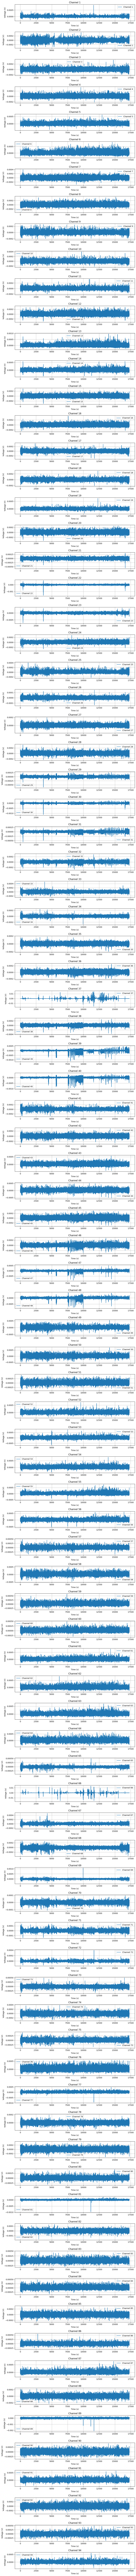

In [ ]:
# Number of channels
num_channels = eeg_data_V.shape[1]

# Create a single figure
plt.figure(figsize=(10, 2 * num_channels))

# Plot each channel
for i in range(num_channels):
    plt.subplot(num_channels, 1, i + 1)
    plt.plot(time, eeg_data_V[:, i], label=f'Channel {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Channel {i+1}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()

### Get the duration for coarse behaviors (Sleep/rest, Inactive, Talk, TV, Computer/phone, Eat, Other activity) in each subject

In [ ]:
def clabel_table_create(
    common_acts, n_parts=12, data_lp="/data2/users/stepeter/files_nwb/downloads/000055/", fs=None
):
    """Create table of coarse label durations across participants.
    Labels to include in the table are specified by common_acts."""
    with DandiAPIClient() as client:
        paths = []
        for file in client.get_dandiset("000055", "draft").get_assets_with_path_prefix(""):
            paths.append(file.path)
    paths = natsort.natsorted(paths)

    vals_all = np.zeros([n_parts, len(common_acts) + 1])
    for part_ind in tqdm(range(n_parts)):
        fids = [val for val in paths if "sub-" + str(part_ind + 1).zfill(2) in val]
        for fid in fids:
            with DandiAPIClient() as client:
                asset = client.get_dandiset("000055", "draft").get_asset_by_path(fid)
                s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)
            f = fs.open(s3_path, "rb")
            file = h5py.File(f)
            with NWBHDF5IO(file=file, mode='r', load_namespaces=True) as io:
                nwb = io.read()

                curr_labels = nwb.intervals["epochs"].to_dataframe()
                durations = (
                    curr_labels.loc[:, "stop_time"].values
                    - curr_labels.loc[:, "start_time"].values
                )

                # Add up durations of each label
                for s, curr_act in enumerate(common_acts):
                    for i, curr_label in enumerate(curr_labels["labels"].tolist()):
                        if curr_act in curr_label.split(", "):
                            vals_all[part_ind, s] += durations[i] / 3600

                # Add up total durations of selected labels (avoid double counting)
                for i, curr_label in enumerate(curr_labels["labels"].tolist()):
                    in_lab_grp = False
                    for sub_lab in curr_label.split(", "):
                        if sub_lab in common_acts:
                            in_lab_grp = True
                    vals_all[part_ind, -1] += durations[i] / 3600 if in_lab_grp else 0
            del nwb, io

    # Make final table/dataframe
    common_acts_col = [val.lstrip("Blocklist (").rstrip(")") for val in common_acts]
    df_all = pd.DataFrame(
        vals_all.round(1),
        index=["P" + str(val + 1).zfill(2) for val in range(n_parts)],
        columns=common_acts_col + ["Total"],
    )
    return df_all


In [ ]:
# Count activity and blocklist coarse label durations for each participant

blocklist_labels = False  # show blocklist (True) or activity (False) label durations

if blocklist_labels:
    common_acts = [
        'Blocklist (Data break)',
        'Blocklist (Camera move/zoom)',
        'Blocklist (Camera occluded)',
        'Blocklist (Experiment)',
        'Blocklist (Private time)',
        'Blocklist (Tether/bandage)',
        'Blocklist (Hands under blanket)',
        'Blocklist (Clinical procedure)',
    ]
else:
    common_acts = [
        'Sleep/rest',
        'Inactive',
        'Talk',
        'TV',
        'Computer/phone',
        'Eat',
        'Other activity',
    ]

# Generate table
clabel_table_create(common_acts,fs=fs)

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version

Sleep/rest  Inactive  Talk    TV  Computer/phone  Eat  Other activity  \
P01        29.2       1.9  15.6  22.0             7.8  2.6             0.8   
P02        53.2       2.1   9.2   7.7             2.9  2.1             4.8   
P03        11.9       0.3  21.8   1.9            19.8  3.5             0.9   
P04        34.0       3.1  28.3  11.0             8.2  2.0             1.2   
P05        35.4       2.8   8.9  12.1             5.8  1.0             1.2   
P06        37.8       0.1   2.8   5.7             2.6  0.3             0.2   
P07        46.8       0.3   5.0   0.3             1.9  0.4             0.2   
P08        47.8       0.8   6.8   5.3             1.3  0.6             2.2   
P09        87.3       8.1   3.8   0.0             0.0  0.6             1.9   
P10        67.5       2.1   5.8   0.1             5.6  0.0             1.8   
P11        36.0       1.4   6.6   0.0             0.1  0.0             0.8   
P12        32.4       0.3   1.5   0.1             0.5  0.0             0.6   

     Total  
P01   75.7  
P02   79.8  
P03   51.1  
P04   78.9  
P05   62.5  
P06   45.3  
P07   53.6  
P08   61.8  
P09  100.6  
P10   81.4  
P11   44.9  
P12   35.4

## Behavioral labels

### Coarse behavior labelling trace for one recording day.
Note that the figure from the data paper combined the targeted (targeted=True) and untargeted (both first_val=True and first_val=False) behavior labels.

In [ ]:
def prune_clabels(
    clabels_orig, targeted=False, targ_tlims=[13, 17], first_val=True, targ_label="Eat"
):
    """Modify coarse behavior labels based on whether
    looking at whole day (targeted=False) or specific
    hours (targeted=True). When selecting specific
    hours, can look at either the first (first_val=True)
    or last (first_val=False) label if there are multiple
    overlapping activity labels."""
    clabels = clabels_orig.copy()
    if not targeted:
        for i in range(len(clabels_orig)):
            lab = clabels_orig.loc[i, "labels"]
            if lab[:5] == "Block":
                clabels.loc[i, "labels"] = "Blocklist"
            elif lab == "":
                clabels.loc[i, "labels"] = "Blocklist"
            elif lab not in ["Sleep/rest", "Inactive"]:
                clabels.loc[i, "labels"] = "Active"
    else:
        for i in range(len(clabels_orig)):
            lab = clabels_orig.loc[i, "labels"]
            if targ_label in lab.split(", "):
                clabels.loc[i, "labels"] = targ_label
            else:
                clabels.loc[i, "labels"] = "Blocklist"
    #             if lab[:5] == 'Block':
    #                 clabels.loc[i, 'labels'] = 'Blocklist'
    #             elif lab == '':
    #                 clabels.loc[i, 'labels'] = 'Blocklist'
    #             elif first_val:
    #                 clabels.loc[i, 'labels'] = lab.split(', ')[0]
    #             else:
    #                 clabels.loc[i, 'labels'] = lab.split(', ')[-1]

    if targeted:
        start_val, end_val = targ_tlims[0] * 3600, targ_tlims[1] * 3600
        clabels = clabels[
            (clabels["start_time"] >= start_val) & (clabels["stop_time"] <= end_val)
        ]
        clabels.reset_index(inplace=True)
    uni_labs = np.unique(clabels["labels"].values)
    return clabels, uni_labs

In [ ]:
def plot_clabels(
    clabels,
    uni_labs,
    targeted=False,
    first_val=True,
    targ_tlims=[13, 17],
    scale_fact=1 / 3600,
    bwidth=0.5,
    targlab_colind=0,
):
    """Plot coarse labels for one recording day.
    Note that the colors for the plots are currently
    pre-defined to work for sub-01 day 4."""
    # Define colors for each label
    act_cols = plt.get_cmap("Reds")(np.linspace(0.15, 0.85, 5))
    if targeted:
        category_colors = np.array(["w", act_cols[targlab_colind]], dtype=object)
    #         if first_val:
    #             category_colors = np.array(['dimgray', act_cols[1], act_cols[2],
    #                                         act_cols[0], act_cols[3], act_cols[4]],
    #                                        dtype=object)
    #         else:
    #             category_colors = np.array(['dimgray', act_cols[1], act_cols[0],
    #                                         act_cols[3], act_cols[4]],
    #                                        dtype=object)
    else:
        category_colors = np.array(
            [[1, 128 / 255, 178 / 255], "dimgray", "lightgreen", "lightskyblue"],
            dtype=object,
        )

    # Plot each label as a horizontal bar
    fig, ax = plt.subplots(figsize=(20, 2), dpi=150)
    for i in range(len(uni_labs)):
        lab_inds = np.nonzero(uni_labs[i] == clabels["labels"].values)[0]
        lab_starts = clabels.loc[lab_inds, "start_time"].values
        lab_stops = clabels.loc[lab_inds, "stop_time"].values
        lab_widths = lab_stops - lab_starts
        rects = ax.barh(
            np.ones_like(lab_widths),
            lab_widths * scale_fact,
            left=lab_starts * scale_fact,
            height=bwidth,
            label=uni_labs[i],
            color=category_colors[i],
        )
    ax.legend(
        ncol=len(uni_labs), bbox_to_anchor=(0, 1), loc="lower left", fontsize="small"
    )

    # Define x-axis based on if targeted window or not
    if targeted:
        plt.xlim(targ_tlims)
        targ_tlims_int = [int(val) for val in targ_tlims]
        plt.xticks(targ_tlims_int)
        ax.set_xticklabels(
            ["{}:00".format(targ_tlims_int[0]), "{}:00".format(targ_tlims_int[-1])]
        )
    else:
        plt.xlim([0, 24])
        plt.xticks([0, 12, 24])
        ax.set_xticklabels(["0:00", "12:00", "0:00"])

    # Remove border lines and show plot
    ax.yaxis.set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.show()
    return fig

In [ ]:
#  set parameters for plotting coarse labels
targ_tlims = [0, 10]  # targeted window to plot (in hours)
targeted = True  # plot targeted window (True) or whole day (False)
targ_label = 'Sleep/rest' #behavior_type

In [ ]:
# Load the data and coarse labels for the targeted window
with DandiAPIClient() as client:
    asset = client.get_dandiset("000055", "draft").get_asset_by_path(
        "sub-01/sub-01_ses-4_behavior+ecephys.nwb"
    )
    s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)
f = fs.open(s3_path, "rb")
file = h5py.File(f)
with NWBHDF5IO(file=file, mode='r', load_namespaces=True) as io:
# with NWBHDF5IO(s3_path, mode='r', load_namespaces=True, driver='ros3') as io:  #if you want to use ROS3 to stream data, use this line instead and comment the three lines above
    nwb = io.read()
    clabels_orig = nwb.intervals['epochs'].to_dataframe()

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [ ]:
# Select coarse labels based on user parameters
label_col_d = {
    'Other activity': 0,
    'Sleep/rest': 1,
    'Eat': 2,
    'TV': 3,
    'Talk': 4
}

clabels, uni_labs = prune_clabels(clabels_orig, targeted,
                                  targ_tlims, None,
                                  targ_label)

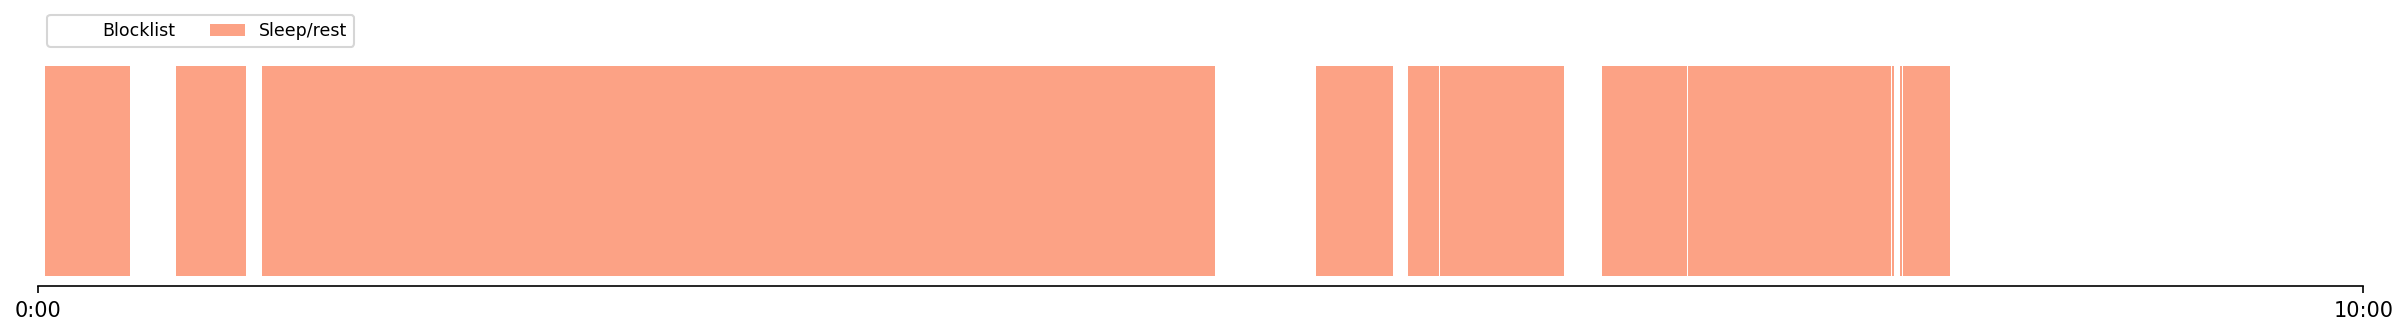

In [ ]:
# Plot coarse labels over time
fig = plot_clabels(clabels, uni_labs, targeted, None, targ_tlims, targlab_colind=label_col_d[targ_label])

## Neural activity and movement behavior relationship

Identify the start and stop times when the behavioral label of interest occurs.

In [ ]:
# get coarse labels from NWB file
min_len = 100  # (sec) only keep times when the given label appears for longer than this amount of time at once

coarse_labels = nwbfile.intervals['epochs'].to_dataframe()
coarse_labels = coarse_labels[coarse_labels['labels'].str.contains(behavior_type)]
coarse_labels['diff'] = coarse_labels['stop_time'] - coarse_labels['start_time']
coarse_labels = coarse_labels[coarse_labels['diff'] > min_len]
coarse_labels.reset_index(inplace=True, drop=True)

# Print the coarse labels as a table
coarse_labels

start_time     stop_time      labels        diff
0       86.533333    206.200000  Sleep/rest  119.666667
1      206.400000    326.166667  Sleep/rest  119.766667
2      326.333333    446.033333  Sleep/rest  119.700000
3      446.166667    565.933333  Sleep/rest  119.766667
4      566.033333    687.000000  Sleep/rest  120.966667
..            ...           ...         ...         ...
288  85775.900000  85895.633333  Sleep/rest  119.733333
289  85895.766667  86015.466667  Sleep/rest  119.700000
290  86015.666667  86135.433333  Sleep/rest  119.766667
291  86135.600000  86255.500000  Sleep/rest  119.900000
292  86255.566667  86375.433333  Sleep/rest  119.866667

[293 rows x 4 columns]

In [ ]:
coarse_labels["labels"]

0      Sleep/rest
1      Sleep/rest
2      Sleep/rest
3      Sleep/rest
4      Sleep/rest
          ...    
288    Sleep/rest
289    Sleep/rest
290    Sleep/rest
291    Sleep/rest
292    Sleep/rest
Name: labels, Length: 293, dtype: object

In [ ]:
nwbfile.acquisition['ElectricalSeries'].data[:,64].shape

(43200000,)